In [ ]:
'''!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)'''


"!sudo apt-get install -y fonts-nanum\n!sudo fc-cache -fv\n!rm ~/.cache/matplotlib -rf\n!apt-get update -qq\n!apt-get install fonts-nanum* -qq\nimport matplotlib.font_manager as fm\nimport warnings\nimport matplotlib.pyplot as plt\nwarnings.filterwarnings(action='ignore')\npath = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕\nfont_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10\nplt.rc('font', family=font_name)"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
building_info = pd.read_csv('building_info.csv')
building_info.head()

,건물번호,건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1,건물기타,110634.00,39570.00,-,-,-
1,2,건물기타,122233.47,99000.00,-,-,-
2,3,건물기타,171243.00,113950.00,40,-,-
3,4,건물기타,74312.98,34419.62,60,-,-
4,5,건물기타,205884.00,150000.00,-,2557,1000


In [ ]:
len(building_info)

100

In [ ]:
building_info['건물유형'].value_counts()

건물기타       15
공공          8
대학교         8
백화점및아울렛     8
병원          8
상용          8
아파트         8
연구소         8
지식산업센터      8
할인마트        8
호텔및리조트      8
데이터센터       5
Name: 건물유형, dtype: int64

In [ ]:
train = pd.read_csv('train.csv')
train.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40


In [ ]:
train.describe()

,건물번호,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
count,204000.000000,204000.000000,43931.000000,203981.000000,203991.000000,128818.000000,116087.000000,204000.000000
mean,50.500000,25.543524,2.040830,2.134031,78.716295,0.333637,1.063823,2451.036462
std,28.866141,3.779523,5.165218,1.358109,15.080108,0.401486,1.001030,2440.648858
min,1.000000,10.100000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000
25%,25.750000,23.400000,0.000000,1.200000,69.000000,0.000000,0.200000,1085.760000
50%,50.500000,25.700000,0.100000,2.000000,81.000000,0.100000,0.710000,1766.400000
75%,75.250000,28.100000,1.300000,2.800000,91.000000,0.700000,1.780000,2970.000000
max,100.000000,37.100000,92.200000,13.300000,100.000000,1.000000,3.920000,25488.400000


In [ ]:
train[train.duplicated()]

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)


In [ ]:
train.isnull().sum()

num_date_time         0
건물번호                  0
일시                    0
기온(C)                 0
강수량(mm)          160069
풍속(m/s)              19
습도(%)                 9
일조(hr)            75182
일사(MJ/m2)         87913
전력소비량(kWh)            0
dtype: int64

<ipython-input-40-50f7c8f79fa0>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


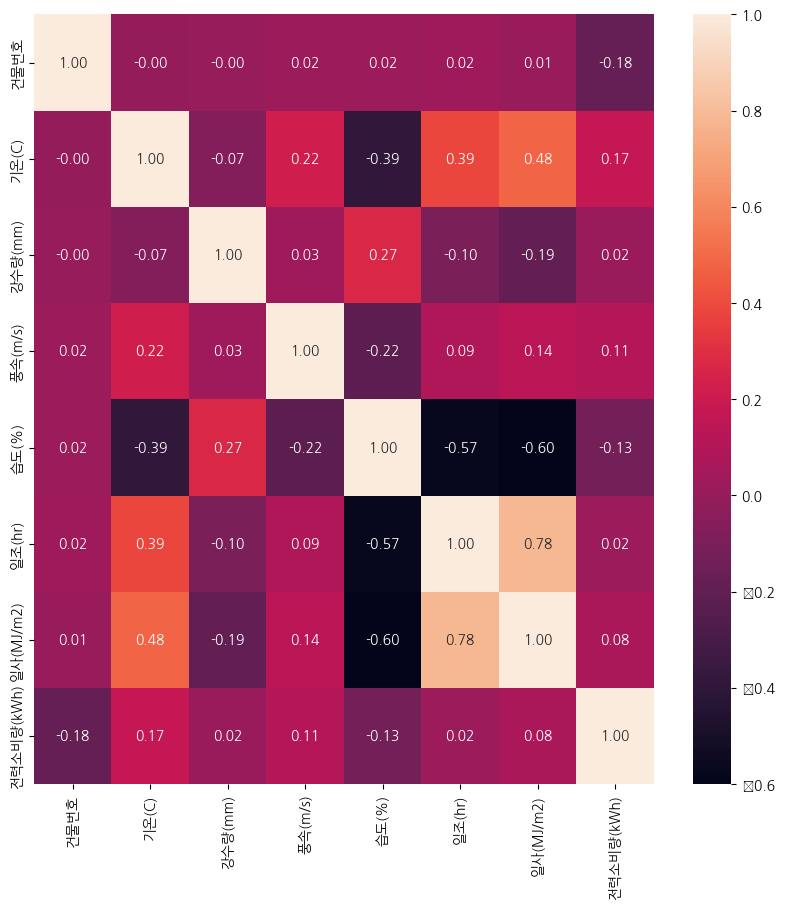

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'
corr = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='0.2f')

In [ ]:
train[train['강수량(mm)'].isnull()]

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40
...,...,...,...,...,...,...,...,...,...,...
203995,100_20220824 19,100,20220824 19,23.1,NaN,0.9,86.0,0.5,NaN,881.04
203996,100_20220824 20,100,20220824 20,22.4,NaN,1.3,86.0,0.0,NaN,798.96
203997,100_20220824 21,100,20220824 21,21.3,NaN,1.0,92.0,NaN,NaN,825.12
203998,100_20220824 22,100,20220824 22,21.0,NaN,0.3,94.0,NaN,NaN,640.08


In [ ]:
train[train['강수량(mm)'].notna()]

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
104,1_20220605 08,1,20220605 08,22.9,0.0,1.3,55.0,0.0,0.25,1440.48
105,1_20220605 09,1,20220605 09,23.6,0.0,1.2,53.0,0.0,0.51,1814.40
116,1_20220605 20,1,20220605 20,20.9,0.0,3.2,64.0,0.0,0.02,2054.40
117,1_20220605 21,1,20220605 21,20.5,0.0,2.4,70.0,NaN,NaN,1716.00
123,1_20220606 03,1,20220606 03,19.3,1.3,1.5,84.0,NaN,NaN,964.32
...,...,...,...,...,...,...,...,...,...,...
203966,100_20220823 14,100,20220823 14,23.8,0.4,0.5,99.0,0.0,NaN,1137.36
203967,100_20220823 15,100,20220823 15,23.8,1.0,0.9,99.0,0.0,NaN,1126.08
203968,100_20220823 16,100,20220823 16,24.4,0.2,0.9,98.0,0.0,NaN,1165.20
203987,100_20220824 11,100,20220824 11,23.7,0.0,0.9,87.0,0.0,NaN,1056.48


In [ ]:
#train['강수량(mm)'] = train['강수량(mm)'].fillna(0)

In [ ]:
train.isnull().sum()

num_date_time        0
건물번호                 0
일시                   0
기온(C)                0
강수량(mm)              0
풍속(m/s)             19
습도(%)                9
일조(hr)           75182
일사(MJ/m2)        87913
전력소비량(kWh)           0
dtype: int64

In [ ]:
train[train['풍속(m/s)'].isnull()]

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh)
16643,9_20220614 11,9,20220614 11,17.6,NaN,NaN,NaN,NaN,NaN,2330.40
30161,15_20220806 17,15,20220806 17,35.6,NaN,NaN,NaN,NaN,NaN,1815.57
32127,16_20220803 15,16,20220803 15,30.4,NaN,NaN,77.0,0.5,2.06,5062.08
51640,26_20220627 16,26,20220627 16,27.2,3.1,NaN,93.0,0.0,0.27,5330.40
51921,26_20220709 09,26,20220709 09,26.3,NaN,NaN,84.0,0.0,0.81,2908.80
84418,42_20220703 10,42,20220703 10,29.8,NaN,NaN,66.0,1.0,2.61,3038.76
100738,50_20220703 10,50,20220703 10,29.8,NaN,NaN,66.0,1.0,2.61,3044.70
105639,52_20220806 15,52,20220806 15,33.4,NaN,NaN,72.0,0.0,NaN,2260.20
105640,52_20220806 16,52,20220806 16,33.5,NaN,NaN,73.0,0.0,NaN,2274.30
176477,87_20220714 05,87,20220714 05,21.9,NaN,NaN,NaN,NaN,NaN,519.66


In [ ]:
# Assuming your DataFrames are named 'building_info' and 'train'
# Merge the two DataFrames on the '건물번호' column
merged_data = pd.merge(train, building_info, on='건물번호')

# Display the first few rows of the merged DataFrame
merged_data.head()

,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),건물유형,연면적(m2),냉방면적(m2),태양광용량(kW),ESS저장용량(kWh),PCS용량(kW)
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,건물기타,110634.0,39570.0,-,-,-
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,건물기타,110634.0,39570.0,-,-,-
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,건물기타,110634.0,39570.0,-,-,-
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,건물기타,110634.0,39570.0,-,-,-
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,건물기타,110634.0,39570.0,-,-,-


In [ ]:
# Assuming your DataFrame is named 'merged_data'

# Drop columns '태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)'
merged_data = merged_data.drop(['태양광용량(kW)', 'ESS저장용량(kWh)', 'PCS용량(kW)'], axis=1)

# Check the updated DataFrame
print(merged_data.head())


## 원핫 인코딩

# Assuming your DataFrame is named 'merged_data'

# Perform one-hot encoding on the '건물 유형' column
merged_data_encoded = pd.get_dummies(merged_data, columns=['건물유형'])

# Check the updated DataFrame
merged_data_encoded.head()

   num_date_time  건물번호           일시  기온(C)  강수량(mm)  풍속(m/s)  습도(%)  일조(hr)  \
0  1_20220601 00     1  20220601 00   18.6      NaN      0.9   42.0     NaN   
1  1_20220601 01     1  20220601 01   18.0      NaN      1.1   45.0     NaN   
2  1_20220601 02     1  20220601 02   17.7      NaN      1.5   45.0     NaN   
3  1_20220601 03     1  20220601 03   16.7      NaN      1.4   48.0     NaN   
4  1_20220601 04     1  20220601 04   18.4      NaN      2.8   43.0     NaN   

   일사(MJ/m2)  전력소비량(kWh)  건물유형   연면적(m2)  냉방면적(m2)  
0        NaN     1085.28  건물기타  110634.0   39570.0  
1        NaN     1047.36  건물기타  110634.0   39570.0  
2        NaN      974.88  건물기타  110634.0   39570.0  
3        NaN      953.76  건물기타  110634.0   39570.0  
4        NaN      986.40  건물기타  110634.0   39570.0  


,num_date_time,건물번호,일시,기온(C),강수량(mm),풍속(m/s),습도(%),일조(hr),일사(MJ/m2),전력소비량(kWh),...,건물유형_대학교,건물유형_데이터센터,건물유형_백화점및아울렛,건물유형_병원,건물유형_상용,건물유형_아파트,건물유형_연구소,건물유형_지식산업센터,건물유형_할인마트,건물유형_호텔및리조트
0,1_20220601 00,1,20220601 00,18.6,NaN,0.9,42.0,NaN,NaN,1085.28,...,0,0,0,0,0,0,0,0,0,0
1,1_20220601 01,1,20220601 01,18.0,NaN,1.1,45.0,NaN,NaN,1047.36,...,0,0,0,0,0,0,0,0,0,0
2,1_20220601 02,1,20220601 02,17.7,NaN,1.5,45.0,NaN,NaN,974.88,...,0,0,0,0,0,0,0,0,0,0
3,1_20220601 03,1,20220601 03,16.7,NaN,1.4,48.0,NaN,NaN,953.76,...,0,0,0,0,0,0,0,0,0,0
4,1_20220601 04,1,20220601 04,18.4,NaN,2.8,43.0,NaN,NaN,986.40,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop columns '강수량(mm)', '일조(hr)', '일사(MJ/m2)'
merged_data = merged_data.drop(['강수량(mm)', '일조(hr)', '일사(MJ/m2)'], axis=1)

# Drop rows with missing values in any column
merged_data = merged_data.dropna()

# Interpolate missing values in '풍속(m/s)' and '습도(%)'
merged_data['풍속(m/s)'] = merged_data['풍속(m/s)'].interpolate(method='linear')
merged_data['습도(%)'] = merged_data['습도(%)'].interpolate(method='linear')

# Check the updated DataFrame
merged_data.isnull().sum()

num_date_time    0
건물번호             0
일시               0
기온(C)            0
풍속(m/s)          0
습도(%)            0
전력소비량(kWh)       0
건물유형             0
연면적(m2)          0
냉방면적(m2)         0
dtype: int64


<ipython-input-53-172e6eaba1d9>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['풍속(m/s)'] = merged_data['풍속(m/s)'].interpolate(method='linear')
<ipython-input-53-172e6eaba1d9>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['습도(%)'] = merged_data['습도(%)'].interpolate(method='linear')


In [ ]:
merged_data.columns

Index(['num_date_time', '건물번호', '일시', '기온(C)', '강수량(mm)', '풍속(m/s)', '습도(%)',
       '일조(hr)', '일사(MJ/m2)', '전력소비량(kWh)', '건물유형', '연면적(m2)', '냉방면적(m2)'],
      dtype='object')